In [1]:
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import *
import seaborn as sns

In [2]:
df_benign = pd.read_csv('D://OneDrive - Higher Education Commission//Collaborations//Daud Khan//Total-CSVs//l2-benign.csv', header=0)

In [3]:
# df_doh = pd.read_csv('D://OneDrive - Higher Education Commission//Collaborations//Daud Khan//Total-CSVs//l1-doh.csv', header=0)

In [4]:
# df_nondoh = pd.read_csv('D://OneDrive - Higher Education Commission//Collaborations//Daud Khan//Total-CSVs//l1-nondoh.csv', header=0)

In [5]:
df_malicious = pd.read_csv('D://OneDrive - Higher Education Commission//Collaborations//Daud Khan//Total-CSVs//l2-malicious.csv', header=0)

In [6]:
# df = pd.concat([df_benign, df_doh, df_nondoh,df_malicious], ignore_index=True)
df = pd.concat([df_benign[1:15000], df_malicious[1:15000]], ignore_index=True)
# df = pd.concat([df_benign[1:1000], df_doh[1:1000], df_nondoh[1:1000],df_malicious[1:1000]], ignore_index=True)

In [7]:
df

SourceIP    DestinationIP  SourcePort  DestinationPort  \
0       192.168.20.191  176.103.130.131       50749              443   
1       192.168.20.191  176.103.130.131       50749              443   
2       192.168.20.191  176.103.130.131       50749              443   
3      176.103.130.131   192.168.20.191         443            50749   
4       192.168.20.191  176.103.130.131       52491              443   
...                ...              ...         ...              ...   
29993   192.168.20.144          8.8.4.4       52562              443   
29994   192.168.20.144          8.8.4.4       52566              443   
29995          8.8.4.4   192.168.20.144         443            52560   
29996   192.168.20.144          8.8.4.4       52564              443   
29997   192.168.20.144          8.8.4.4       52568              443   

                 TimeStamp    Duration  FlowBytesSent  FlowSentRate  \
0      2020-01-14 15:50:52  122.309318          93828    767.136973   
1      2020-01-14 15:52:55  120.958413          38784    320.639127   
2      2020-01-14 15:54:56  110.501080          61993    561.017141   
3      2020-01-14 15:56:46   54.229891          83641   1542.341289   
4      2020-01-14 15:57:40  145.460721          54084    371.811714   
...                    ...         ...            ...           ...   
29993  2020-03-19 06:25:10  120.832003            612      5.064883   
29994  2020-03-19 06:25:12  105.760489          21611    204.339070   
29995  2020-03-19 06:26:10   58.923443            526      8.926837   
29996  2020-03-19 06:26:11  120.831985            612      5.064884   
29997  2020-03-19 06:26:13  105.144769          21797    207.304654   

       FlowBytesReceived  FlowReceivedRate  ...  \
0                 101232        827.672018  ...   
1                  38236        316.108645  ...   
2                  69757        631.278898  ...   
3                  76804       1416.266907  ...   
4                  63843        438.901991  ...   
...                  ...               ...  ...   
29993                544          4.502119  ...   
29994              42521        402.049956  ...   
29995                364          6.177507  ...   
29996                544          4.502119  ...   
29997              41816        397.699290  ...   

       PacketTimeCoefficientofVariation  ResponseTimeTimeVariance  \
0                              0.509047              1.169641e-03   
1                              0.732636              7.851554e-04   
2                              0.646859              4.110453e-04   
3                              0.507334              7.907866e-02   
4                              0.736075              6.430451e-04   
...                                 ...                       ...   
29993                          0.653848              2.348913e-06   
29994                          0.630948              8.580713e-05   
29995                          0.508427              4.263347e+01   
29996                          0.653859              7.949375e-10   
29997                          0.659386              7.659894e-03   

       ResponseTimeTimeStandardDeviation  ResponseTimeTimeMean  \
0                               0.034200              0.024387   
1                               0.028021              0.029238   
2                               0.020274              0.019925   
3                               0.281209              0.025930   
4                               0.025358              0.025075   
...                                  ...                   ...   
29993                           0.001533              0.025651   
29994                           0.009263              0.025111   
29995                           6.529431             11.309422   
29996                           0.000028              0.024681   
29997                           0.087521              0.037465   

       ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0     

In [8]:
df.head()

SourceIP    DestinationIP  SourcePort  DestinationPort  \
0   192.168.20.191  176.103.130.131       50749              443   
1   192.168.20.191  176.103.130.131       50749              443   
2   192.168.20.191  176.103.130.131       50749              443   
3  176.103.130.131   192.168.20.191         443            50749   
4   192.168.20.191  176.103.130.131       52491              443   

             TimeStamp    Duration  FlowBytesSent  FlowSentRate  \
0  2020-01-14 15:50:52  122.309318          93828    767.136973   
1  2020-01-14 15:52:55  120.958413          38784    320.639127   
2  2020-01-14 15:54:56  110.501080          61993    561.017141   
3  2020-01-14 15:56:46   54.229891          83641   1542.341289   
4  2020-01-14 15:57:40  145.460721          54084    371.811714   

   FlowBytesReceived  FlowReceivedRate  ...  PacketTimeCoefficientofVariation  \
0             101232        827.672018  ...                          0.509047   
1              38236        316.108645  ...                          0.732636   
2              69757        631.278898  ...                          0.646859   
3              76804       1416.266907  ...                          0.507334   
4              63843        438.901991  ...                          0.736075   

   ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0                  0.001170                           0.034200   
1                  0.000785                           0.028021   
2                  0.000411                           0.020274   
3                  0.079079                           0.281209   
4                  0.000643                           0.025358   

   ResponseTimeTimeMean  ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0              0.024387                0.021043              0.026981   
1              0.029238                0.026921              0.026855   
2              0.019925                0.019268              0.026918   
3              0.025930                0.000047              0.000021   
4              0.025075                0.026813              0.026903   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                        0.293297                     -0.075845   
1                        0.248064                      0.085061   
2                        0.097199                     -0.344926   
3                        0.276133                      0.092135   
4                       -0.205614                     -0.072087   

   ResponseTimeTimeCoefficientofVariation   Label  
0                                1.402382  Benign  
1                                0.958348  Benign  
2                                1.017535  Benign  
3                               10.844829  Benign  
4                                1.011300  Benign  

[5 rows x 35 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SourceIP                                29998 non-null  object 
 1   DestinationIP                           29998 non-null  object 
 2   SourcePort                              29998 non-null  int64  
 3   DestinationPort                         29998 non-null  int64  
 4   TimeStamp                               29998 non-null  object 
 5   Duration                                29998 non-null  float64
 6   FlowBytesSent                           29998 non-null  int64  
 7   FlowSentRate                            29998 non-null  float64
 8   FlowBytesReceived                       29998 non-null  int64  
 9   FlowReceivedRate                        29998 non-null  float64
 10  PacketLengthVariance                    29998 non-null  fl

In [10]:
cat_cols=['SourceIP','DestinationIP','TimeStamp']

In [11]:
encoder = OrdinalEncoder()

In [12]:
pd.options.mode.chained_assignment = None

In [13]:
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data
#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df[columns])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SourceIP                                29998 non-null  float64
 1   DestinationIP                           29998 non-null  float64
 2   SourcePort                              29998 non-null  int64  
 3   DestinationPort                         29998 non-null  int64  
 4   TimeStamp                               29998 non-null  float64
 5   Duration                                29998 non-null  float64
 6   FlowBytesSent                           29998 non-null  int64  
 7   FlowSentRate                            29998 non-null  float64
 8   FlowBytesReceived                       29998 non-null  int64  
 9   FlowReceivedRate                        29998 non-null  float64
 10  PacketLengthVariance                    29998 non-null  fl

In [15]:
df=df.dropna()

In [16]:
X=df.loc[1:,:'ResponseTimeTimeCoefficientofVariation']
y=df.loc[1:,'Label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest_Neighbors",
#    "Linear SVM",
    "RBF_SVM",
#    "Gaussian Process",
    "Decision_Tree",
    "Random_Forest",
    "Neural_Net",
    "AdaBoost",
    "Naive_Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(n_neighbors=4), #ok
#    SVC(kernel="linear", C=0.025), #takes too much time
    SVC(gamma=2, C=1), #ok
#    GaussianProcessClassifier(1.0 * RBF(1.0)), #a little time
    DecisionTreeClassifier(max_depth=5), #fast
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), #fast
    MLPClassifier(alpha=1, max_iter=1000), #fast
    AdaBoostClassifier(), #fast
    GaussianNB(), #fast
    QuadraticDiscriminantAnalysis(), #fast
]

{'Benign': {'precision': 0.9965698143664246, 'recall': 0.995766129032258, 'f1-score': 0.9961678096006455, 'support': 4960}, 'Malicious': {'precision': 0.9957386363636364, 'recall': 0.9965475223395613, 'f1-score': 0.9961429151441331, 'support': 4924}, 'accuracy': 0.9961554026709835, 'macro avg': {'precision': 0.9961542253650304, 'recall': 0.9961568256859097, 'f1-score': 0.9961553623723893, 'support': 9884}, 'weighted avg': {'precision': 0.9961557390441129, 'recall': 0.9961554026709835, 'f1-score': 0.9961554077083076, 'support': 9884}}
[[4939   21]
 [  17 4907]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


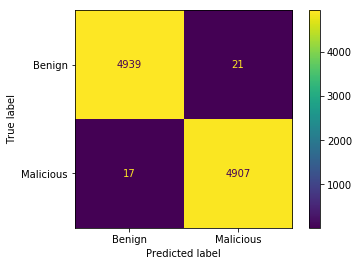

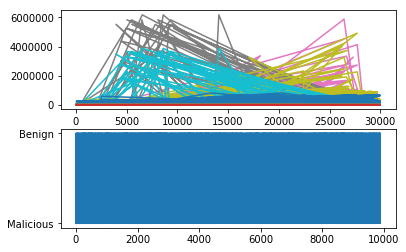

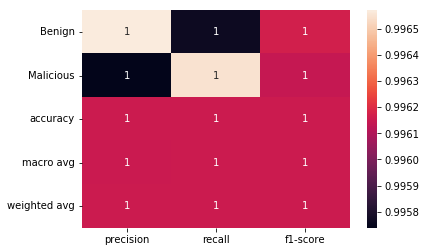

Nearest_NeighborsTraining Score:  0.9974086809189217
{'Benign': {'precision': 1.0, 'recall': 0.0006048387096774194, 'f1-score': 0.0012089462018940159, 'support': 4960}, 'Malicious': {'precision': 0.49833012852950104, 'recall': 1.0, 'f1-score': 0.6651806822019588, 'support': 4924}, 'accuracy': 0.49848239579117765, 'macro avg': {'precision': 0.7491650642647505, 'recall': 0.5003024193548387, 'f1-score': 0.3331948142019264, 'support': 9884}, 'weighted avg': {'precision': 0.75007866783481, 'recall': 0.49848239579117765, 'f1-score': 0.3319856386406151, 'support': 9884}}
[[   3 4957]
 [   0 4924]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


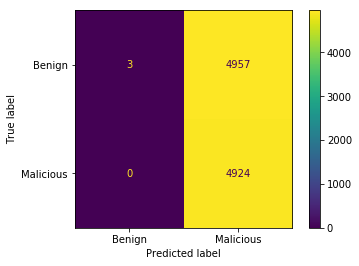

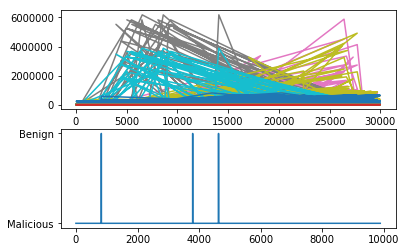

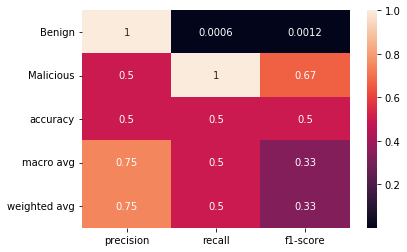

RBF_SVMTraining Score:  1.0
{'Benign': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4960}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4924}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9884}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9884}}
[[4960    0]
 [   0 4924]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


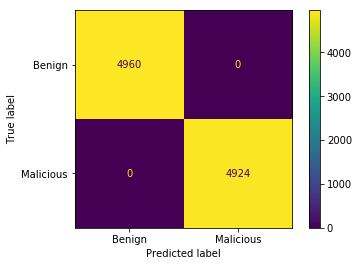

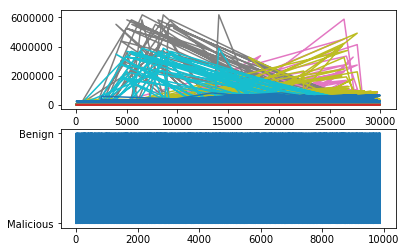

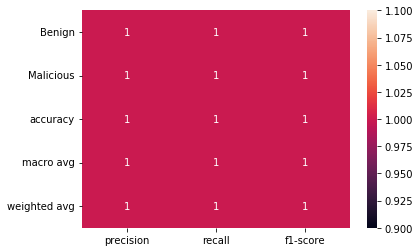

Decision_TreeTraining Score:  1.0
{'Benign': {'precision': 0.99468628653178, 'recall': 0.98125, 'f1-score': 0.9879224601644169, 'support': 4960}, 'Malicious': {'precision': 0.9813664596273292, 'recall': 0.9947197400487409, 'f1-score': 0.9879979828542612, 'support': 4924}, 'accuracy': 0.9879603399433428, 'macro avg': {'precision': 0.9880263730795547, 'recall': 0.9879848700243704, 'f1-score': 0.987960221509339, 'support': 9884}, 'weighted avg': {'precision': 0.9880506301499998, 'recall': 0.9879603399433428, 'f1-score': 0.9879600839730768, 'support': 9884}}
[[4867   93]
 [  26 4898]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


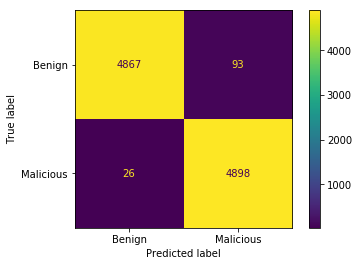

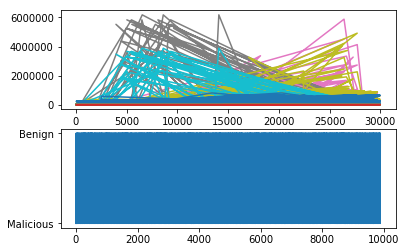

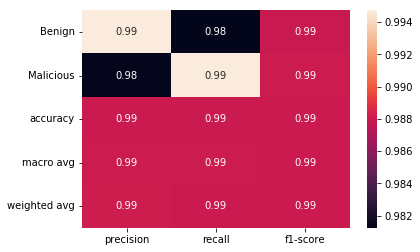

Random_ForestTraining Score:  0.9854487466985599
{'Benign': {'precision': 0.9896020795840832, 'recall': 0.9977822580645161, 'f1-score': 0.9936753338018272, 'support': 4960}, 'Malicious': {'precision': 0.9977472865041982, 'recall': 0.9894394800974817, 'f1-score': 0.9935760171306209, 'support': 4924}, 'accuracy': 0.9936260623229461, 'macro avg': {'precision': 0.9936746830441407, 'recall': 0.9936108690809989, 'f1-score': 0.993625675466224, 'support': 9884}, 'weighted avg': {'precision': 0.9936598496037763, 'recall': 0.9936260623229461, 'f1-score': 0.9936258563343019, 'support': 9884}}
[[4949   11]
 [  52 4872]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


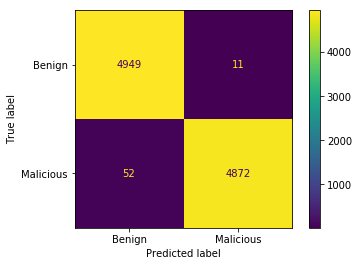

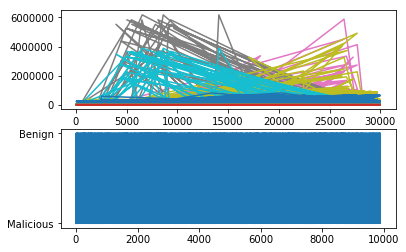

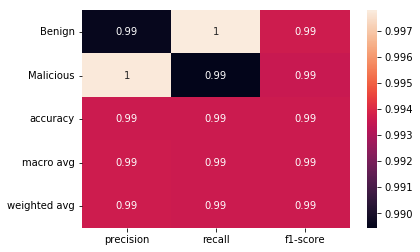

Neural_NetTraining Score:  0.9930732047640405
{'Benign': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4960}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4924}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9884}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9884}}
[[4960    0]
 [   0 4924]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


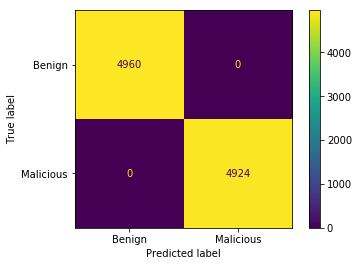

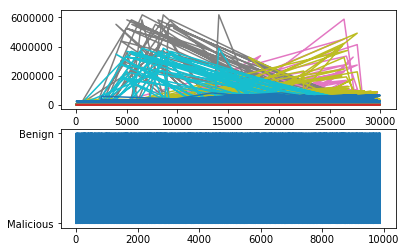

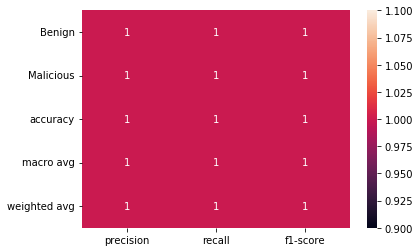

AdaBoostTraining Score:  1.0
{'Benign': {'precision': 0.9967312631333177, 'recall': 0.8606854838709678, 'f1-score': 0.9237260629665692, 'support': 4960}, 'Malicious': {'precision': 0.8766291733618997, 'recall': 0.9971567831031681, 'f1-score': 0.9330166270783847, 'support': 4924}, 'accuracy': 0.9286726021853501, 'macro avg': {'precision': 0.9366802182476087, 'recall': 0.928921133487068, 'f1-score': 0.928371345022477, 'support': 9884}, 'weighted avg': {'precision': 0.9368989391719192, 'recall': 0.9286726021853501, 'f1-score': 0.9283544257434388, 'support': 9884}}
[[4269  691]
 [  14 4910]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


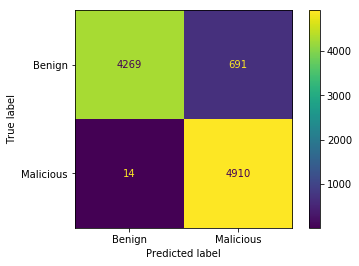

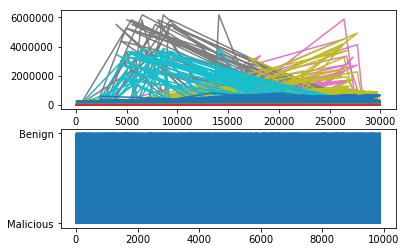

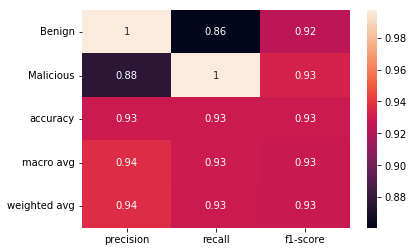

Naive_BayesTraining Score:  0.9240544177007026
{'Benign': {'precision': 0.9889276194381792, 'recall': 0.9723790322580645, 'f1-score': 0.9805835112330995, 'support': 4960}, 'Malicious': {'precision': 0.9726383063710805, 'recall': 0.9890333062550771, 'f1-score': 0.980767294330883, 'support': 4924}, 'accuracy': 0.9806758397409956, 'macro avg': {'precision': 0.9807829629046299, 'recall': 0.9807061692565708, 'f1-score': 0.9806754027819913, 'support': 9884}, 'weighted avg': {'precision': 0.9808126277807132, 'recall': 0.9806758397409956, 'f1-score': 0.9806750680899881, 'support': 9884}}
[[4823  137]
 [  54 4870]]


c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=['Benign' 'Malicious'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


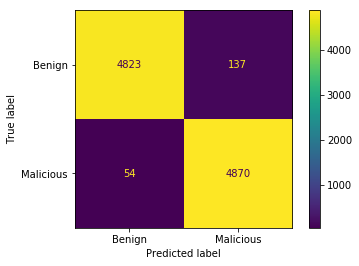

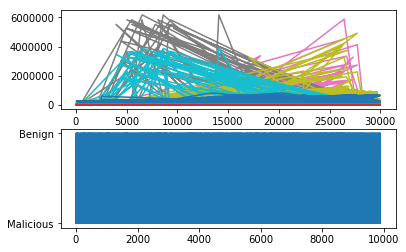

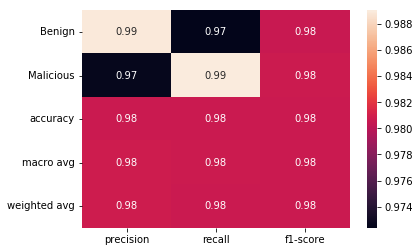

QDATraining Score:  0.9774256241590671


In [19]:
for name, classifier in zip(names, classifiers):
    model = classifier
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(list(y_test),y_pred)
    report = classification_report(list(y_test),y_pred,output_dict=True)
    print(report)
    print(cm)
    disp = ConfusionMatrixDisplay(cm, clf.classes_)
    disp.plot()
    plt.savefig(name+'ConfusionMatrix.png', dpi=300, format='png', bbox_inches='tight')
    plt.show()
    # Plotting test prediction and classification report
    plt.figure(1)
    plt.subplot(211)
    plt.plot(X_test)
    plt.subplot(212)
    plt.plot(y_pred)
    plt.savefig(name+'xTestYPredict.png', dpi=300, format='png', bbox_inches='tight')
    plt.show()
    # plotting classification report
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
    plt.savefig(name+'test_plot_classif_report.png', dpi=300, format='png', bbox_inches='tight')
    plt.show()
    plt.close()
    print(name+ "Training Score: ",clf.score(X_train,y_train))

In [20]:
#model = KNeighborsClassifier(n_neighbors=4)
# model = classifiers[9]
# clf = model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [21]:
# Plotting confusion matrix
# cm = confusion_matrix(list(y_test),y_pred)
# report = classification_report(list(y_test),y_pred,output_dict=True)
# print(report)
# print(cm)
# disp = ConfusionMatrixDisplay(cm, clf.classes_)
# disp.plot()
# plt.savefig('ConfusionMatrix.png', dpi=300, format='png', bbox_inches='tight')
# plt.show()
# # Plotting test prediction and classification report
# plt.figure(1)
# plt.subplot(211)
# plt.plot(X_test)
# plt.subplot(212)
# plt.plot(y_pred)
# plt.savefig('xTestYPredict.png', dpi=300, format='png', bbox_inches='tight')
# plt.show()
# # plotting classification report
# sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
# plt.savefig('test_plot_classif_report.png', dpi=300, format='png', bbox_inches='tight')
# plt.show()
# plt.close()
# print("Training Score: ",clf.score(X_train,y_train))